In [226]:
# Import relevant libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [227]:
# Load data
data=pd.read_csv("Final Variable Data.csv")
data.head()

,Unnamed: 0,Date,Recnum,mean_amt_card_1,max_amt_card_1,median_amt_card_1,sum_amt_card_1,mean_amt_card_3,max_amt_card_3,median_amt_card_3,...,rel_amt_amt_card_merch_30,dayssince_card,dayssince_merch,dayssince_cardmerch,dayssince_cardzip,dayssince_cardstate,risk_dayofweek,card_U*,merch_U*,Fraud
0,0,2010-01-01,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1.000000,337,345,345,345,345,0.026,1.000000,1.000894,0
1,1,2010-01-01,2,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,1.000000,337,345,345,345,345,0.026,1.000894,1.000894,0
2,2,2010-01-01,3,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,1.000000,337,345,345,345,345,0.026,1.000894,1.000894,0
3,3,2010-01-01,4,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,0.500000,337,365,345,345,345,0.026,1.000000,1.010684,0
4,4,2010-01-01,5,3.62,3.62,3.62,7.24,3.62,3.62,3.62,...,0.666667,357,365,365,365,365,0.026,1.000000,1.031246,0


# Z Scaled Data

In [228]:
variables=list(["max_amt_cardmerch_14",
"max_amt_cardstate_14",
"mean_amt_card_30",
"mean_amt_cardmerch_3",
"mean_amt_cardzip_14",
"mean_amt_cardzip_3",
"max_amt_cardstate_30",
"max_amt_merch_14",
"mean_amt_merch_3",
"mean_amt_card_14",
"mean_amt_cardstate_1",
"mean_amt_cardmerch_7",
"median_amt_cardmerch_3",
"mean_amt_cardmerch_30",
"median_amt_cardzip_1",
"max_amt_cardstate_1",
"sum_amt_cardmerch_7",
"sum_amt_merch_3",
"sum_amt_cardmerch_3",
"sum_amt_merch_7",
"median_amt_cardmerch_1",
"mean_amt_merch_1",
"mean_amt_card_1",
"sum_amt_cardzip_1",
"max_amt_card_1",
"max_amt_cardmerch_1",
"sum_amt_card_1",
"max_amt_cardzip_7"])

len(variables)

28

In [229]:
#Z scaled data 28 variables
df2=(data[variables]-np.mean(data[variables]))/np.std(data[variables])

In [230]:
# Add fraud label & record number
df2=df2.merge(data[['Fraud','Recnum']],right_index=True,left_index=True)

In [231]:
cols=list(df2.columns)

In [232]:
cols=cols[:-3:-1]+cols[:-2]

In [233]:
df2=df2[cols]

In [234]:
df2.head()

,Recnum,Fraud,max_amt_cardmerch_14,max_amt_cardstate_14,mean_amt_card_30,mean_amt_cardmerch_3,mean_amt_cardzip_14,mean_amt_cardzip_3,max_amt_cardstate_30,max_amt_merch_14,...,sum_amt_cardmerch_3,sum_amt_merch_7,median_amt_cardmerch_1,mean_amt_merch_1,mean_amt_card_1,sum_amt_cardzip_1,max_amt_card_1,max_amt_cardmerch_1,sum_amt_card_1,max_amt_cardzip_7
0,1,0,-0.452618,-0.498582,-0.816115,-0.487468,-0.499234,-0.489201,-0.540252,-0.623489,...,-0.150503,-0.368934,-0.486834,-0.505163,-0.536482,-0.200453,-0.479737,-0.445986,-0.215078,-0.444981
1,2,0,-0.425922,-0.475100,-0.758403,-0.453101,-0.464396,-0.454703,-0.518761,-0.604729,...,-0.143646,-0.364296,-0.452142,-0.469345,-0.498234,-0.189846,-0.452772,-0.416271,-0.206977,-0.417856
2,3,0,-0.284692,-0.350873,-0.453089,-0.271293,-0.280092,-0.272202,-0.405068,-0.505484,...,-0.107372,-0.339763,-0.268611,-0.279852,-0.295893,-0.133728,-0.310117,-0.259068,-0.164117,-0.274359
3,4,0,-0.452618,-0.498582,-0.816115,-0.487468,-0.499234,-0.489201,-0.540252,-0.623489,...,-0.150503,-0.368330,-0.486834,-0.505163,-0.536482,-0.200453,-0.479737,-0.445986,-0.215078,-0.444981
4,5,0,-0.452618,-0.498582,-0.816115,-0.487468,-0.499234,-0.489201,-0.540252,-0.623489,...,-0.149610,-0.367726,-0.486834,-0.505163,-0.536482,-0.199072,-0.479737,-0.445986,-0.214023,-0.444981


# create Train Test OOT

In [235]:
df2=df2.merge(data['Date'],right_index=True,left_index=True)

In [236]:
df2['Date']=pd.to_datetime(df2['Date'])

In [237]:
train_test=df2[df2.Date<'2010-11-01']
oot=df2[df2.Date>='2010-11-01']

In [238]:
train_test.drop(columns='Date',inplace=True)
oot.drop(columns='Date',inplace=True)

In [239]:
oot

,Recnum,Fraud,max_amt_cardmerch_14,max_amt_cardstate_14,mean_amt_card_30,mean_amt_cardmerch_3,mean_amt_cardzip_14,mean_amt_cardzip_3,max_amt_cardstate_30,max_amt_merch_14,...,sum_amt_cardmerch_3,sum_amt_merch_7,median_amt_cardmerch_1,mean_amt_merch_1,mean_amt_card_1,sum_amt_cardzip_1,max_amt_card_1,max_amt_cardmerch_1,sum_amt_card_1,max_amt_cardzip_7
83970,84300,0,-0.281322,-0.042827,-0.255705,-0.266954,-0.275693,-0.267846,-0.123143,-0.503115,...,-0.106506,-0.339178,-0.264231,-0.275330,-0.291064,-0.132389,-0.306712,-0.255316,-0.163094,-0.270934
83971,84301,0,-0.240029,-0.311587,-0.408839,-0.276090,-0.253380,-0.277017,-0.369113,-0.048966,...,-0.108329,-0.130892,-0.273453,-0.284851,-0.301231,-0.135209,-0.313881,-0.263215,-0.165248,-0.278145
83972,84302,0,-0.405199,-0.326876,-0.354197,-0.426424,-0.437353,-0.427924,-0.284541,-0.590166,...,-0.138323,-0.360697,-0.425212,-0.441540,-0.468544,-0.181612,-0.431840,-0.393204,-0.200688,-0.396800
83973,84303,0,-0.432087,-0.052904,-0.623441,-0.461038,-0.472442,-0.462670,-0.132365,-0.609061,...,-0.145229,-0.365367,-0.460154,-0.477616,-0.507067,-0.192295,-0.458999,-0.423133,-0.208848,-0.424120
83974,84304,0,-0.362783,-0.419562,-0.137041,-0.371821,-0.382000,-0.373113,-0.382255,-0.560360,...,-0.127429,-0.353328,-0.370091,-0.384629,-0.407774,-0.164758,-0.388996,-0.345991,-0.187816,-0.353703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,0,-0.374671,-0.430020,-0.647608,-0.387125,-0.397514,-0.388476,-0.477503,-0.568714,...,-0.130482,-0.355394,-0.385541,-0.400580,-0.424807,-0.169481,-0.401004,-0.359224,-0.191423,-0.365783
96393,96750,0,0.119934,0.146652,0.480880,-0.345144,-0.053505,-0.346334,0.527630,-0.110691,...,-0.122106,-0.349729,-0.343161,-0.356824,0.011443,-0.156523,0.181186,-0.322924,0.018099,-0.332648
96394,96751,0,-0.106972,-0.194548,0.094349,-0.042510,-0.048166,-0.042546,-0.261999,1.052991,...,-0.061725,0.705117,-0.037659,1.352268,-0.041271,-0.063111,-0.130603,-0.061247,-0.110183,-0.093785
96395,96752,0,1.658488,1.358370,0.973368,2.230207,2.255759,2.238841,1.159239,0.959847,...,0.391727,0.584844,2.256599,2.327376,2.488123,0.638393,1.652671,1.903892,0.425591,1.700023


# Model starts :) Are you ready ? Funn !!!

In [240]:
train_test_backup=train_test.copy()
oot_backup=oot.copy()

In [241]:
X,y=train_test.drop(axis=1,labels=['Fraud','Recnum']).values,train_test['Fraud'].values.ravel()

In [242]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Add OoooOt

In [243]:
X_oot,y_oot=oot.drop(axis=1,labels=['Fraud','Recnum']).values,oot['Fraud'].values.ravel()

# Model result Evaluation :D

In [244]:
def FDR_top3perc_evaluation(model, X_test, y_test):
    '''calculate the percentage of fraud caught at top 3 percent in decreasing order'''
    result = model.predict_proba(X_test)[:,1]
    test_pred =  pd.DataFrame(y_test, columns = ['Fraud'])
    test_pred['predicted']= result.tolist()
    test_pred = test_pred.sort_values(by='predicted', ascending = False)
    
    
    topRows= int(round(len(test_pred)*0.03)) # number of rows to slice for evaluaiton
    top = test_pred.head(topRows)
    
    total_num_fraud= y_test.sum() # total number of fraud in test dataset
    
    FDR = top.loc[:,'Fraud'].sum() / total_num_fraud
    return FDR

# Logistic Model

In [245]:
# from sklearn import linear_model
# c=[0.01,0.001,0.0001]
# for i in c:
#     for j in range(0,10):
#         avg_value_train=[]
#         avg_value_test=[]
#         avg_value_oot=[]
#         from sklearn.model_selection import train_test_split
#         X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#         clf =linear_model.LogisticRegression(C=i,random_state=None).fit(X_train, y_train)
#         avg_value_train.append(FDR_top3perc_evaluation(clf, X_train, y_train))
#         avg_value_test.append(FDR_top3perc_evaluation(clf, X_test, y_test))
#         avg_value_oot.append(FDR_top3perc_evaluation(clf, X_oot, y_oot))
#     print(f'Avg train at {i} is {np.mean(avg_value_train)}')
#     print(f'Avg test at {i} is {np.mean(avg_value_test)}')
#     print(f'Avg oot at {i} is {np.mean(avg_value_oot)}')

# Boosted Tree

In [246]:
# from sklearn.ensemble import GradientBoostingClassifier
# n= list(np.arange(30,60,10))
# learning=[0.01,0.1]
# depth=[3,4,5]
# for i in n :
#     for j in learning:
#         for k in depth:
#             for t in range(0,10):
#                 avg_value_train=[]
#                 avg_value_test=[]
#                 avg_value_oot=[]
#                 from sklearn.model_selection import train_test_split
#                 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#                 bt=GradientBoostingClassifier(n_estimators=i, learning_rate=j,max_depth=k).fit(X_train, y_train)
#                 avg_value_train.append(FDR_top3perc_evaluation(bt, X_train, y_train))
#                 avg_value_test.append(FDR_top3perc_evaluation(bt, X_test, y_test))
#                 avg_value_oot.append(FDR_top3perc_evaluation(bt, X_oot, y_oot))
#             print(f'Average train for N={i} LR={j} Depth={k} is {np.mean(avg_value_train)}')
#             print(f'Average test for N={i} LR={j} Depth={k} is {np.mean(avg_value_test)}')
#             print(f'Average oot for N={i} LR={j} Depth={k} is {np.mean(avg_value_oot)}\n')
                
                

# Random Forest

In [247]:
# from sklearn.ensemble import RandomForestClassifier
# n=[100,200,300]
# max_depth=[2,3]
# for i in n:
#     for j in max_depth:
#         for p in range(0,10):
#             avg_value_train=[]
#             avg_value_test=[]
#             avg_value_oot=[]
#             from sklearn.model_selection import train_test_split
#             X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#             rfc = RandomForestClassifier(max_depth=j, n_estimators = i,  n_jobs = -1,max_features = 5).fit(X_train, y_train)
#             avg_value_train.append(FDR_top3perc_evaluation(rfc, X_train, y_train))
#             avg_value_test.append(FDR_top3perc_evaluation(rfc, X_test, y_test))
#             avg_value_oot.append(FDR_top3perc_evaluation(rfc, X_oot, y_oot))
#         print(f'Average train for N={i} LR={j} Depth={k} is {np.mean(avg_value_train)}')
#         print(f'Average test for N={i} LR={j} Depth={k} is {np.mean(avg_value_test)}')
#         print(f'Average oot for N={i} LR={j} Depth={k} is {np.mean(avg_value_oot)}')
        

# Neural Network

In [248]:
# from sklearn.neural_network import MLPClassifier
# size=[(4,2),(5,3),(6,4),(7,4)]
# for i in size :
#     for p in range(0,10):
#         avg_value_train=[]
#         avg_value_test=[]
#         avg_value_oot=[]
#         from sklearn.model_selection import train_test_split
#         X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#         nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=i).fit(X_train, y_train)
#         avg_value_train.append(FDR_top3perc_evaluation(nn, X_train, y_train))
#         avg_value_test.append(FDR_top3perc_evaluation(nn, X_test, y_test))
#         avg_value_oot.append(FDR_top3perc_evaluation(nn, X_oot, y_oot))
#     print(f'Average train for N={i} LR={j} Depth={k} is {np.mean(avg_value_train)}')
#     print(f'Average test for N={i} LR={j} Depth={k} is {np.mean(avg_value_test)}')
#     print(f'Average oot for N={i} LR={j} Depth={k} is {np.mean(avg_value_oot)}')

In [249]:
# X_train=train_test.iloc[:,2:]
# y_train=train_test.iloc[:,1]
# X_test=X_oot
# y_test=y_oot

In [250]:
len(y_oot)

12427

In [251]:
# def FDR_top3perc_evaluation(model, X_test, y_test):
#     per=[]
#     FDR_r=[]
#     FPR_r=[]
#     '''calculate the percentage of fraud caught at top 3 percent in decreasing order'''
#     for i in range(0,101,1):
#         per.append(i)
#         result = model.predict_proba(X_test)[:,1]
#         result2=model.predict(X_test)
#         test_pred =  pd.DataFrame(y_test, columns = ['Fraud'])
#         test_pred['pred_val']=result2.tolist()
#         test_pred['predicted']= result.tolist()
# #         test_pred = test_pred.sort_values(by='predicted', ascending = False)
# #         test_pred['group'] =pd.qcut(test_pred['predicted'].rank(method='first'), q=100)
#         #testing_tb = test_pred.groupby(['group']).sum().sort_index( ascending = False).head(20)[['Fraud']].rename(columns={'Fraud_x':'# Bads'})
#         #testing_final = testing_tb.join(testing_tb.cumsum().rename(columns ={ '# Bads':'Cumulative Bads'}))
# #         topRows= int(round(len(test_pred)*i/100)) # number of rows to slice for evaluaiton
# #         top = test_pred.head(topRows)
# #         total_num_fraud= y_test.sum() # total number of fraud in test dataset
# #         FDR = (top.loc[:,'Fraud'].sum() / total_num_fraud)*100
# #         FDR_r.append(FDR)
 
#     return test_pred

In [252]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
bt=GradientBoostingClassifier(n_estimators=40, learning_rate=0.1,max_depth=4).fit(X_train, y_train)

In [253]:
FDR_top3perc_evaluation(bt,X_train, y_train)

0.8855799373040752

In [254]:
FDR_top3perc_evaluation(bt,X_test, y_test)

0.8181818181818182

In [255]:
FDR_top3perc_evaluation(bt,X_oot, y_oot)

0.5418994413407822

In [256]:
result = bt.predict_proba(X_train)[:,1]
result

array([0.00159051, 0.00159051, 0.00193992, ..., 0.00193992, 0.00159051,
       0.00159051])

In [257]:
train_pred =  pd.DataFrame(result, columns = ['fraud_label_predicted'])
train_pred

,fraud_label_predicted
0,0.001591
1,0.001591
2,0.001940
3,0.001591
4,0.001591
...,...
58774,0.001591
58775,0.001591
58776,0.001940
58777,0.001591


In [278]:
training = pd.DataFrame(y_train, columns =['fraud_label' ])\
.join(train_pred).sort_values(by = 'fraud_label_predicted', ascending = False)
training

,fraud_label,fraud_label_predicted
2496,1,1.000000
10835,1,1.000000
36796,1,1.000000
25025,1,1.000000
20316,1,1.000000
...,...,...
9265,0,0.001437
58437,0,0.001437
34606,0,0.001339
4048,0,0.001278


In [279]:
training['group'] =pd.qcut(training['fraud_label_predicted'].rank(method='first'), q=100)
training

,fraud_label,fraud_label_predicted,group
2496,1,1.000000,"(58191.22, 58779.0]"
10835,1,1.000000,"(58191.22, 58779.0]"
36796,1,1.000000,"(58191.22, 58779.0]"
25025,1,1.000000,"(58191.22, 58779.0]"
20316,1,1.000000,"(58191.22, 58779.0]"
...,...,...,...
9265,0,0.001437,"(0.999, 588.78]"
58437,0,0.001437,"(0.999, 588.78]"
34606,0,0.001339,"(0.999, 588.78]"
4048,0,0.001278,"(0.999, 588.78]"


In [280]:
training_tb = training.groupby(['group']).sum().sort_index( ascending = False).head(50)[['fraud_label']].rename(columns={'fraud_label':'# Bads'})
training_tb

,# Bads
group,
"(58191.22, 58779.0]",510
"(57603.44, 58191.22]",44
"(57015.66, 57603.44]",11
"(56427.88, 57015.66]",9
"(55840.1, 56427.88]",7
"(55252.32, 55840.1]",4
"(54664.54, 55252.32]",7
"(54076.76, 54664.54]",1
"(53488.98, 54076.76]",2


In [281]:
training_final = training_tb.join(training_tb.cumsum().rename(columns ={ '# Bads':'Cumulative Bads'}))

In [282]:
training_final.to_excel('trainingcumbad.xlsx')
training_final


,# Bads,Cumulative Bads
group,,
"(58191.22, 58779.0]",510,510
"(57603.44, 58191.22]",44,554
"(57015.66, 57603.44]",11,565
"(56427.88, 57015.66]",9,574
"(55840.1, 56427.88]",7,581
"(55252.32, 55840.1]",4,585
"(54664.54, 55252.32]",7,592
"(54076.76, 54664.54]",1,593
"(53488.98, 54076.76]",2,595


In [283]:
training['fraud_label'].sum()

638

In [284]:
result = bt.predict_proba(X_test)[:,1]
test_pred =  pd.DataFrame(result, columns = ['fraud_label_predicted'])

testing = pd.DataFrame(y_test, columns =['fraud_label' ])\
.join(test_pred).sort_values(by = 'fraud_label_predicted', ascending = False)
testing['group'] =pd.qcut(testing['fraud_label_predicted'].rank(method='first'), q=100)
testing

,fraud_label,fraud_label_predicted,group
2652,0,1.000000,"(24939.1, 25191.0]"
22277,1,1.000000,"(24939.1, 25191.0]"
24803,0,1.000000,"(24939.1, 25191.0]"
17494,0,1.000000,"(24939.1, 25191.0]"
11894,0,1.000000,"(24939.1, 25191.0]"
...,...,...,...
18491,0,0.001478,"(0.999, 252.9]"
24832,0,0.001478,"(0.999, 252.9]"
6859,0,0.001437,"(0.999, 252.9]"
11904,0,0.001278,"(0.999, 252.9]"


In [285]:
testing_tb = testing.groupby(['group']).sum().sort_index( ascending = False).head(50)[['fraud_label']].rename(columns={'fraud_label':'# Bads'})
testing_final = testing_tb.join(testing_tb.cumsum().rename(columns ={ '# Bads':'Cumulative Bads'}))
testing_final.to_excel('testingcumbad.xlsx')
testing_final

,# Bads,Cumulative Bads
group,,
"(24939.1, 25191.0]",171,171
"(24687.2, 24939.1]",21,192
"(24435.3, 24687.2]",6,198
"(24183.4, 24435.3]",4,202
"(23931.5, 24183.4]",4,206
"(23679.6, 23931.5]",3,209
"(23427.7, 23679.6]",4,213
"(23175.8, 23427.7]",1,214
"(22923.9, 23175.8]",0,214


In [286]:
result = bt.predict_proba(X_oot)[:,1]
oot_pred =  pd.DataFrame(result, columns = ['fraud_label_predicted'])

oot = pd.DataFrame(y_oot, columns =['fraud_label' ])\
.join(oot_pred).sort_values(by = 'fraud_label_predicted', ascending = False)
oot['group'] =pd.qcut(oot['fraud_label_predicted'].rank(method='first'), q=100)
oot

,fraud_label,fraud_label_predicted,group
12117,0,1.000000,"(12302.74, 12427.0]"
10261,1,1.000000,"(12302.74, 12427.0]"
5545,0,1.000000,"(12302.74, 12427.0]"
4068,0,0.996378,"(12302.74, 12427.0]"
5142,1,0.993669,"(12302.74, 12427.0]"
...,...,...,...
8369,0,0.001571,"(0.999, 125.26]"
9925,0,0.001571,"(0.999, 125.26]"
11262,0,0.001571,"(0.999, 125.26]"
1062,0,0.001571,"(0.999, 125.26]"


In [293]:
oot_tb = oot.groupby(['group']).sum().sort_index( ascending = False).head(50)[['fraud_label']].rename(columns={'fraud_label':'# Bads'})
oot_final = oot_tb.join(oot_tb.cumsum().rename(columns ={ '# Bads':'Cumulative Bads'}))
#oot_final.to_excel('ootcumbad.xlsx')

len(training),len(testing),len(oot)

(58779, 25191, 12427)

In [296]:
training['fraud_label'].sum(),testing['fraud_label'].sum(),oot['fraud_label'].sum()

(638, 242, 179)

# tIme charts

In [22]:
train_test_plot=p.merge(train_test,left_index=True,right_index=True)

In [23]:
train_test_plot.tail()

,Fraud_x,pred_val,predicted,Recnum,Fraud_y,max_amt_cardmerch_14,max_amt_cardstate_14,mean_amt_card_30,mean_amt_cardmerch_3,mean_amt_cardzip_14,...,sum_amt_cardmerch_3,sum_amt_merch_7,median_amt_cardmerch_1,mean_amt_merch_1,mean_amt_card_1,sum_amt_cardzip_1,max_amt_card_1,max_amt_cardmerch_1,sum_amt_card_1,max_amt_cardzip_7
83965,0,0,0.000299,84295,0,-0.168229,-0.248430,-0.108704,-0.121367,-0.128107,...,-0.077458,-0.031182,-0.117263,-0.046701,-0.129034,-0.087452,-0.192478,-0.129432,-0.128773,-0.156025
83966,0,0,0.002399,84296,0,0.129048,0.013057,-0.004324,-0.004064,-0.009193,...,0.043287,-0.168508,0.001151,-0.159766,0.001517,0.099346,0.107798,0.201467,0.013893,0.146024
83967,0,0,0.000237,84297,0,-0.230426,-0.303140,-0.363619,-0.201436,-0.209275,...,-0.093434,-0.330336,-0.198091,-0.207042,-0.218146,-0.112166,-0.255304,-0.198664,-0.147649,-0.219222
83968,0,0,0.001192,84298,0,0.120078,0.005168,0.421958,0.249778,0.248134,...,-0.003408,-0.269449,0.257399,0.263242,0.284027,0.027107,0.098738,0.191484,-0.041279,0.136911
83969,0,0,0.000163,84299,0,-0.427285,-0.476300,-0.413292,-0.454857,-0.466176,...,-0.143996,-0.026178,-0.453914,-0.188192,-0.500188,-0.190388,-0.454149,-0.417789,-0.207390,-0.419242


In [24]:
d=c.merge(oot.reset_index(),left_index=True,right_index=True)

In [25]:
d.tail()

,Fraud_x,pred_val,predicted,index,Recnum,Fraud_y,max_amt_cardmerch_14,max_amt_cardstate_14,mean_amt_card_30,mean_amt_cardmerch_3,...,sum_amt_cardmerch_3,sum_amt_merch_7,median_amt_cardmerch_1,mean_amt_merch_1,mean_amt_card_1,sum_amt_cardzip_1,max_amt_card_1,max_amt_cardmerch_1,sum_amt_card_1,max_amt_cardzip_7
12422,0,0,0.000208,96392,96749,0,-0.374671,-0.430020,-0.647608,-0.387125,...,-0.130482,-0.355394,-0.385541,-0.400580,-0.424807,-0.169481,-0.401004,-0.359224,-0.191423,-0.365783
12423,0,0,0.000226,96393,96750,0,0.119934,0.146652,0.480880,-0.345144,...,-0.122106,-0.349729,-0.343161,-0.356824,0.011443,-0.156523,0.181186,-0.322924,0.018099,-0.332648
12424,0,0,0.001456,96394,96751,0,-0.106972,-0.194548,0.094349,-0.042510,...,-0.061725,0.705117,-0.037659,1.352268,-0.041271,-0.063111,-0.130603,-0.061247,-0.110183,-0.093785
12425,0,0,0.002917,96395,96752,0,1.658488,1.358370,0.973368,2.230207,...,0.391727,0.584844,2.256599,2.327376,2.488123,0.638393,1.652671,1.903892,0.425591,1.700023
12426,0,0,0.003324,96396,96753,0,0.076520,2.152782,-0.154800,-0.194513,...,0.026634,-0.249131,0.200793,0.204798,0.221620,0.009799,0.054740,0.142999,-0.054498,2.617665


In [26]:
d3=pd.read_excel('DQR3.xlsx')

In [27]:
d3_1=d3.merge(d,on='Recnum',how='inner')

In [28]:
d3_2=d3.merge(train_test_plot,on='Recnum',how='inner')

In [29]:
d3_1=d3_1[['Merchnum','Cardnum','predicted','Date','Recnum']]

In [30]:
d3_2=d3_2[['Merchnum','Cardnum','predicted','Date','Recnum']]

In [31]:
new=pd.concat([d3_2,d3_1])

In [32]:
d6=new.groupby(['Date','Merchnum'])['Merchnum'].size()

In [33]:
frauds_new=new[new['predicted']>0.5].sort_values(by='predicted')

In [34]:
frauds_new

,Merchnum,Cardnum,predicted,Date,Recnum
6821,6899988049601,5142194136,0.500621,2010-12-06,91140
26244,6006333528866,5142189113,0.505546,2010-04-11,26309
53900,930090121224,5142212038,0.507688,2010-07-18,54089
53922,930090121224,5142212038,0.507688,2010-07-18,54111
35565,4620009957157,5142271065,0.508457,2010-05-14,35671
29411,6929,5142151962,0.514359,2010-04-23,29491
34243,9108234610000,5142189341,0.518019,2010-05-09,34347
6280,5000006000095,5142205500,0.522570,2010-12-02,90599
5087,4353000719908,5142235211,0.526487,2010-11-25,89401
3436,4503738417400,5142847398,0.529549,2010-01-15,3443


In [35]:
# frauds_new[frauds_new['Merchnum']=='4620009957157']

In [36]:
import matplotlib.pyplot as plt
timeplot1=new[(new['Merchnum']=='4620009957157')][['Date','predicted']]

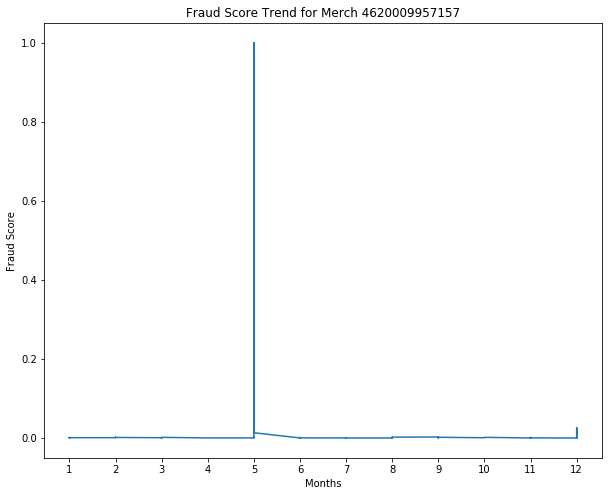

In [37]:
plt.figure(figsize=(10,8))
plt.plot(timeplot1['Date'].dt.month,timeplot1['predicted'])
plt.xticks(np.arange(1,13,1))
plt.ylabel('Fraud Score')
plt.xlabel('Months')
plt.title('Fraud Score Trend for Merch 4620009957157')
plt.show()

In [38]:
new['month']=new['Date'].dt.month

In [39]:
month_card=new[new['Merchnum']=='4620009957157'].groupby('month').size()

In [40]:
month_transact=new[new['Merchnum']=='4620009957157'].groupby('Merchnum').cumcount()+1

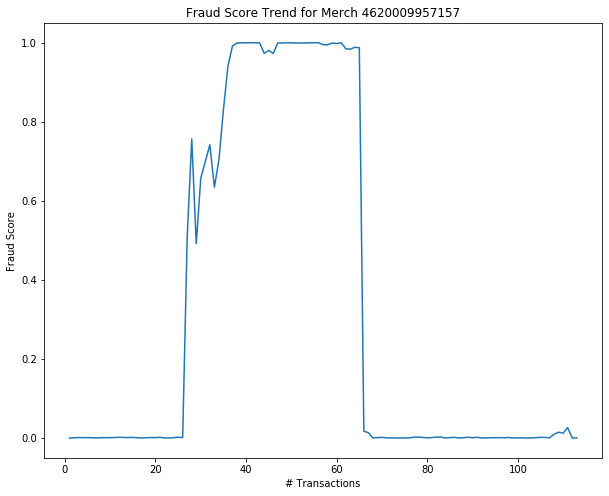

In [41]:
plt.figure(figsize=(10,8))
plt.plot(month_transact,timeplot1['predicted'])
plt.ylabel('Fraud Score')
plt.xlabel('# Transactions')
plt.title('Fraud Score Trend for Merch 4620009957157')
plt.show()

# Card num time plots

In [42]:
import matplotlib.pyplot as plt
timeplot2=new[(new['Cardnum']==5142235211)][['Date','predicted','Cardnum']]

In [43]:
timeplot2=timeplot2[timeplot2['Date'].dt.month==11][1:-5]

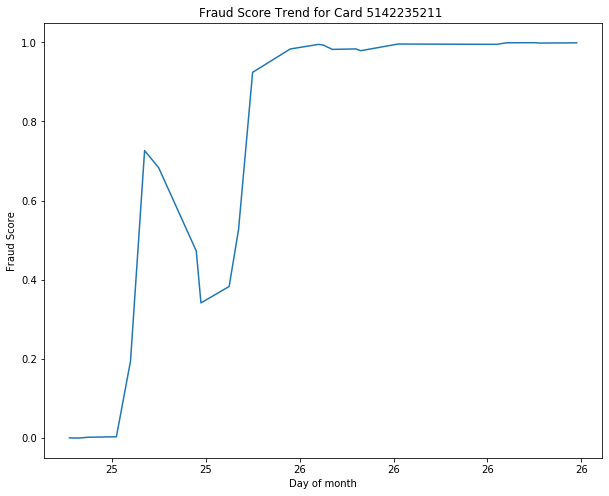

In [44]:
plt.figure(figsize=(10,8))
plt.plot(timeplot2['predicted'])
plt.xticks([5060,5080,5100,5120,5140,5160],[25,25,26,26,26,26])
plt.ylabel('Fraud Score')
plt.xlabel('Day of month')
plt.title('Fraud Score Trend for Card 5142235211 ')
plt.show()

In [45]:
import matplotlib.pyplot as plt
timeplot2=new[(new['Cardnum']==5142235211)][['Date','predicted','Cardnum']]
month_transact2=timeplot2.groupby('Cardnum').cumcount()+1

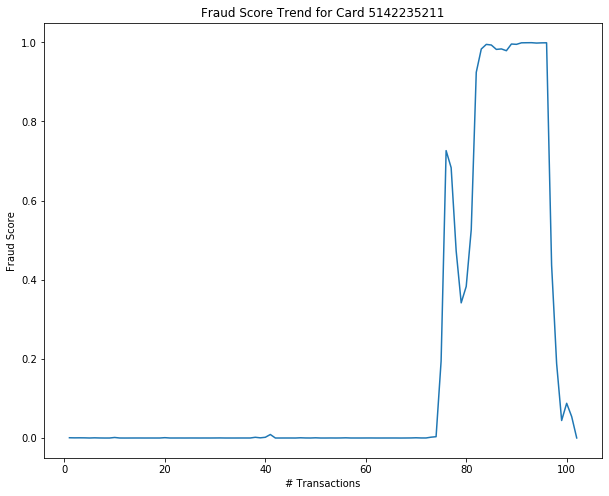

In [46]:
plt.figure(figsize=(10,8))
plt.plot(month_transact2,timeplot2['predicted'])
plt.ylabel('Fraud Score')
plt.xlabel('# Transactions')
plt.title('Fraud Score Trend for Card 5142235211')
plt.show()

In [47]:
month_transact2

16216      1
16323      2
16568      3
16575      4
16928      5
17031      6
20623      7
22846      8
25337      9
25833     10
25842     11
26638     12
29356     13
34153     14
34854     15
35765     16
37144     17
37246     18
37546     19
37655     20
40783     21
43078     22
44313     23
45048     24
46175     25
46655     26
47837     27
48719     28
48947     29
49006     30
        ... 
5055      73
5061      74
5064      75
5067      76
5070      77
5078      78
5079      79
5085      80
5087      81
5090      82
5098      83
5104      84
5105      85
5107      86
5112      87
5113      88
5121      89
5142      90
5144      91
5147      92
5150      93
5151      94
5158      95
5159      96
5160      97
5164      98
5204      99
5213     100
5216     101
5888     102
Length: 102, dtype: int64